# Face recognition on Photos

In [ ]:
!pip install opencv-python
!pip install dlib
!pip install tensorflow

In [ ]:
!pip install keras-facenet
!pip install keras-vggface

# VGG-Face

Извлечение ROI лица с использованием OpenCV

In [ ]:
import cv2
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from tensorflow.keras.preprocessing.image import img_to_array

In [ ]:
# 1. Инициализация модели VGG-Face и извлечение слоя fc2
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)


# 2. Функция для детекции и извлечения признаков лица
def get_face_features(img_path):
    # Детекция лица с использованием OpenCV
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)
    for (x, y, w, h) in faces:
        face_roi = img[y:y+h, x:x+w]  # извлекаем ROI лица для дальнейшего анализа

        face_img = cv2.resize(face_roi, (224, 224))
        x = img_to_array(face_img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        features = model.predict(x)
        return features


# 3. Сравнение признаков лица
def is_match(features1, features2, threshold=50):
    distance = np.linalg.norm(features1 - features2)
    return distance < threshold


# 4. Сохранение признаков лица
def save_face_features(person_images_dict):
    for person_name, img in person_images_dict.items():
      for idx, img_path in enumerate(img, 1):
        features = get_face_features(img_path)
        if features is not None:
            np.save(f'/content/features/{person_name}_features{idx}.npy', features)


# 5. Загрузка признаков лица
def load_face_features(features_name):
    return np.load(f'/content/features/{features_name}')


# 6. Отображение результата
def display_image_with_results(img_path, persons_dict, features_files):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y, w, h) in faces:
        # Проверяем соответствие каждого дескриптора
        recognized_name = None
        for person_name in persons_dict:
            for features_name in features_files:
                if features_name.startswith(person_name):
                    saved_features = load_face_features(features_name)
                    if is_match(saved_features, get_face_features(img_path)):
                        recognized_name = person_name
                        break

        if recognized_name:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
            cv2.putText(img, recognized_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
        else:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(img, "Not Recognized", (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)

    # Если вы работаете в Jupyter Notebook:
    from matplotlib import pyplot as plt
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

In [ ]:
# Сохраняем дескрипторы лица с именем
person_images_dict = {
    'Ben Afflek': ['/content/ben_afflek1.jpg',
                   '/content/ben_afflek2.jpg',
                   '/content/ben_afflek3.jpg',
                   '/content/ben_afflek4.jpg',
                   '/content/ben_afflek5.jpg',
                   '/content/ben_afflek6.jpg',
                   '/content/ben_afflek7.jpg',
                   '/content/ben_afflek8.jpg'],
    'Madonna': ['/content/madonna1.jpg',
                '/content/madonna2.jpg',
                '/content/madonna3.jpg',
                '/content/madonna4.jpg',
                '/content/madonna5.jpg',
                '/content/madonna6.jpg',
                '/content/madonna7.jpg',
                '/content/madonna8.jpg'],
    'Elton John': ['/content/elton_john1.jpg',
                   '/content/elton_john2.jpg',
                   '/content/elton_john3.jpg',
                   '/content/elton_john4.jpg',
                   '/content/elton_john5.jpg',
                   '/content/elton_john6.jpg',
                   '/content/elton_john7.jpg',
                   '/content/elton_john8.jpg']
}

save_face_features(person_images_dict)

In [ ]:
import os

persons_dict = ['Ben Afflek', 'Madonna', 'Elton John']
features_files = os.listdir('/content/features')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 611ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 925ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 801ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step


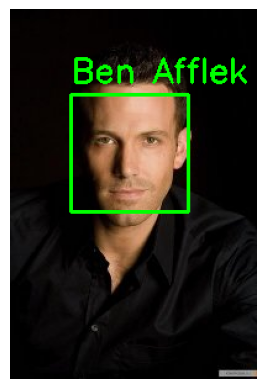

In [ ]:
# Тестирование на новом изображении
new_image_path = "/content/ben_afflek_test1.jpg"
display_image_with_results(new_image_path, persons_dict, features_files)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 986ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 829ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 616ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 592ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step


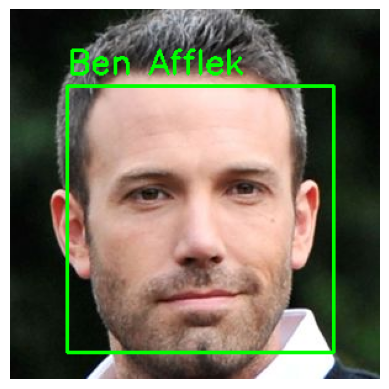

In [ ]:
new_image_path = "/content/ben_afflek_test2.jpg"
display_image_with_results(new_image_path, persons_dict, features_files)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 585ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 589ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 826ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 800ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 964ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 924ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 609ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 595ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


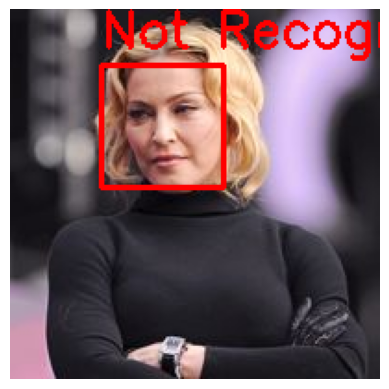

In [ ]:
new_image_path = "/content/madonna_test1.jpg"
display_image_with_results(new_image_path, persons_dict, features_files)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 590ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 699ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 605ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 832ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 954ms/step


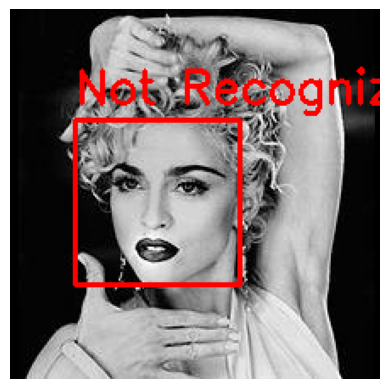

In [ ]:
new_image_path = "/content/madonna_test2.jpg"
display_image_with_results(new_image_path, persons_dict, features_files)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 697ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 602ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 600ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 768ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 796ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 939ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


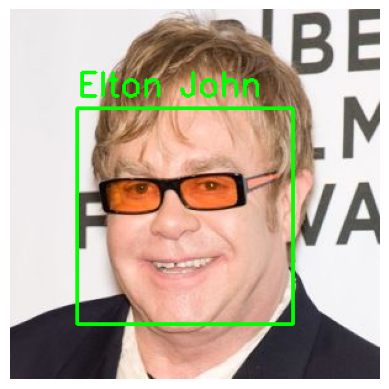

In [ ]:
new_image_path = "/content/elton_john_test1.jpg"
display_image_with_results(new_image_path, persons_dict, features_files)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 888ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 854ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 887ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 584ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 606ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 931ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 593ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step


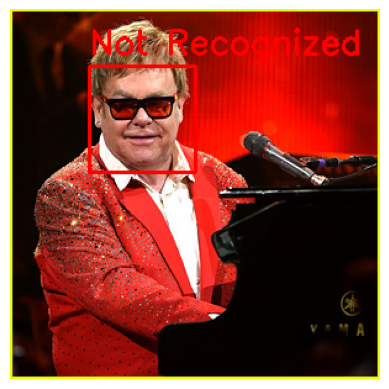

In [ ]:
new_image_path = "/content/elton_john_test2.jpg"
display_image_with_results(new_image_path, persons_dict, features_files)

# Face recognition on Video

In [ ]:
!pip install opencv-python
!pip install dlib
!pip install tensorflow

In [ ]:
!pip install face-recognition

In [ ]:
import face_recognition
import cv2
import numpy as np

In [ ]:
# Путь к видеофайлу
video_name = 'madonna_1'
cap = cv2.VideoCapture(f'{video_name}.mp4')

# Получение параметров видео для записи результата
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS)) # количество кадров в секунду
fourcc = cv2.VideoWriter_fourcc(*'mp4v') # 4-байтовый код, который используется для указания видеокодека

frame_number = int(cap.get(cv2.CAP_PROP_FRAME_COUNT)) # количество кадров в видео
print('Number of frames in video:', frame_number)

# Сохранение видеофайла
out = cv2.VideoWriter(f'output_{video_name}.mp4', fourcc, fps, (width, height))

In [ ]:
# Загружаем изображения людей и извлекаем признаки
known_face_names = [
    'Ben Afflek',
    'Madonna',
    'Elton John',
    'Dua Lipa',
    'Angelina Jolie',
    'Brad Pitt'
]
known_face_encodings = []

for name in known_face_names:
    image_path = f'/content/images_for_video/{name}.jpg'
    known_image = face_recognition.load_image_file(image_path)
    known_face_locations = face_recognition.face_locations(known_image)
    known_encoding = face_recognition.face_encodings(known_image, known_face_locations)[0]
    known_face_encodings.append(known_encoding)

In [ ]:
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Ищем лицо на кадре и извлекаем признаки
    face_locations = face_recognition.face_locations(frame)
    face_encodings = face_recognition.face_encodings(frame, face_locations)

    # Проходимся по каждому лицу
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Сравниваем лицо с уже известными лицами
        matches = face_recognition.compare_faces([known_face_encodings], face_encoding)
        name = "Not Recognized"

        if np.any(matches):
            match_scores = [face_recognition.face_distance(known_face_encodings, face_encoding)]
            best_match_index = np.argmin(match_scores)
            name = known_face_names[best_match_index]

        # Рисуем прямоугольник и подпись
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0, 255), 2)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(frame, name, (left + 6, bottom - 6), font, 0.5, (255, 255, 255), 1)

    # Записываем кадр в выходное видео
    out.write(frame)

cap.release()
out.release()
cv2.destroyAllWindows()

Number of frames in video 'ben_afflek.mp4': 3659

Number of frames in video 'dua_lipa.mp4': 228

Number of frames in video 'dua_lipa_elton_john.mp4': 3590

Number of frames in video 'jolie_pitt.mp4': 1344

Number of frames in video 'madonna_1.mp4': 310

Number of frames in video 'madonna_2.mp4': 559